# Análise e pré-processamento dos dados

## Importação das bibliotecas necessárias e do dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

A seguir, importamos o arquivo seeds_dataset.txt, porém, é importante observar que o arquivo foi fornecido com erros de tabulação, e tivemos que editar manualmente o arquivo para alinhar as colunas para algumas das linhas, para podermos trabalhar com um arquivo corretamente formatado. Possivelmente existe uma maneira mais automatizada de fazer isso, mas dado o tamanho do arquivo (apenas 205 linhas), decidimos que não justificava o tempo investido.

In [2]:
data = pd.read_csv('/content/seeds_dataset.txt', sep='\t', header=None)

data.columns = [
    'area',
    'perimetro',
    'capacidade',
    'comp_do_nucleo',
    'larg_do_nucleo',
    'coef_de_assimetria',
    'comp_do_sulco_do_nucleo',
    'classe'
]

# Exibindo as primeiras linhas para verificar
data.head()

,area,perimetro,capacidade,comp_do_nucleo,larg_do_nucleo,coef_de_assimetria,comp_do_sulco_do_nucleo,classe
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


Aproveitamos também para identificar e remover (caso necessário) valores ausentes:

In [3]:
print(data.isnull().sum())
data.fillna(data.mean(), inplace=True)

area                       0
perimetro                  0
capacidade                 0
comp_do_nucleo             0
larg_do_nucleo             0
coef_de_assimetria         0
comp_do_sulco_do_nucleo    0
classe                     0
dtype: int64


## Cálculo das estatísticas descritivas de tendência central para cada campo:

In [4]:
data.describe()

mean = data.mean()
median = data.median()
std = data.std()

print("Média:\n", mean)
print("Mediana:\n", median)
print("Desvio Padrão:\n", std)

Média:
 area                       14.847524
perimetro                  14.559286
capacidade                  0.870999
comp_do_nucleo              5.628533
larg_do_nucleo              3.258605
coef_de_assimetria          3.700201
comp_do_sulco_do_nucleo     5.408071
classe                      2.000000
dtype: float64
Mediana:
 area                       14.35500
perimetro                  14.32000
capacidade                  0.87345
comp_do_nucleo              5.52350
larg_do_nucleo              3.23700
coef_de_assimetria          3.59900
comp_do_sulco_do_nucleo     5.22300
classe                      2.00000
dtype: float64
Desvio Padrão:
 area                       2.909699
perimetro                  1.305959
capacidade                 0.023629
comp_do_nucleo             0.443063
larg_do_nucleo             0.377714
coef_de_assimetria         1.503557
comp_do_sulco_do_nucleo    0.491480
classe                     0.818448
dtype: float64


## Visualização das distribuições

Histogramas nos permitem visualizar a distribuição dos valores em cada variável.

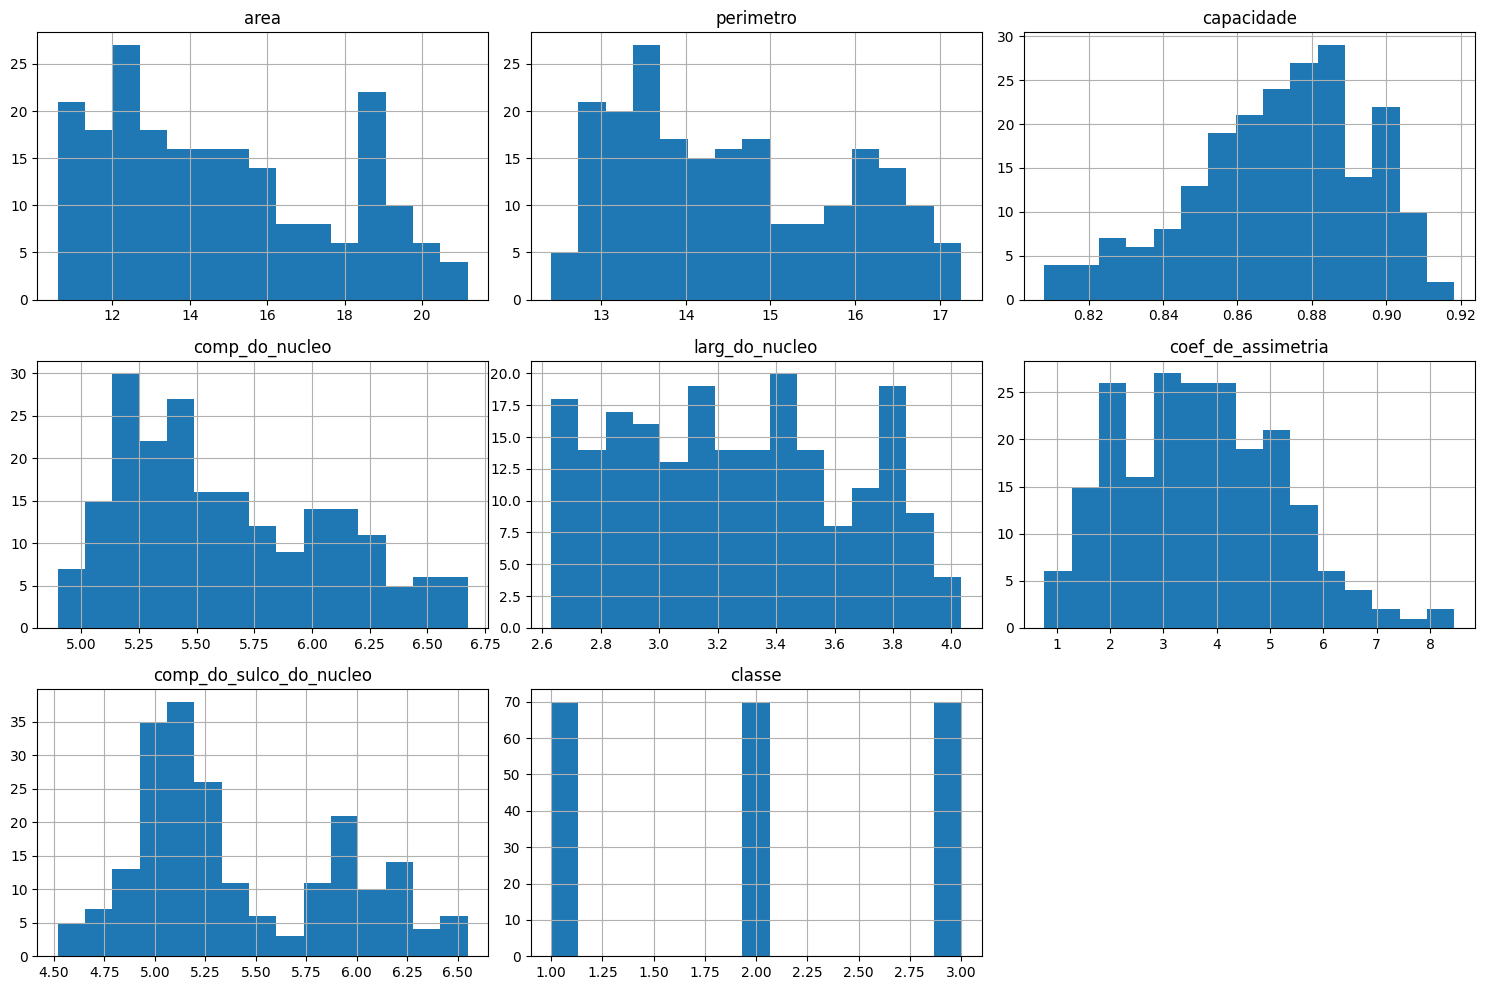

In [5]:
data.hist(figsize=(15, 10), bins=15)
plt.tight_layout()
plt.show()


Com boxplots podemos visualizar claramente se existem outliers evidentes na distribuição dos dados, como é  caso da variável `coef_de_assimetria`.

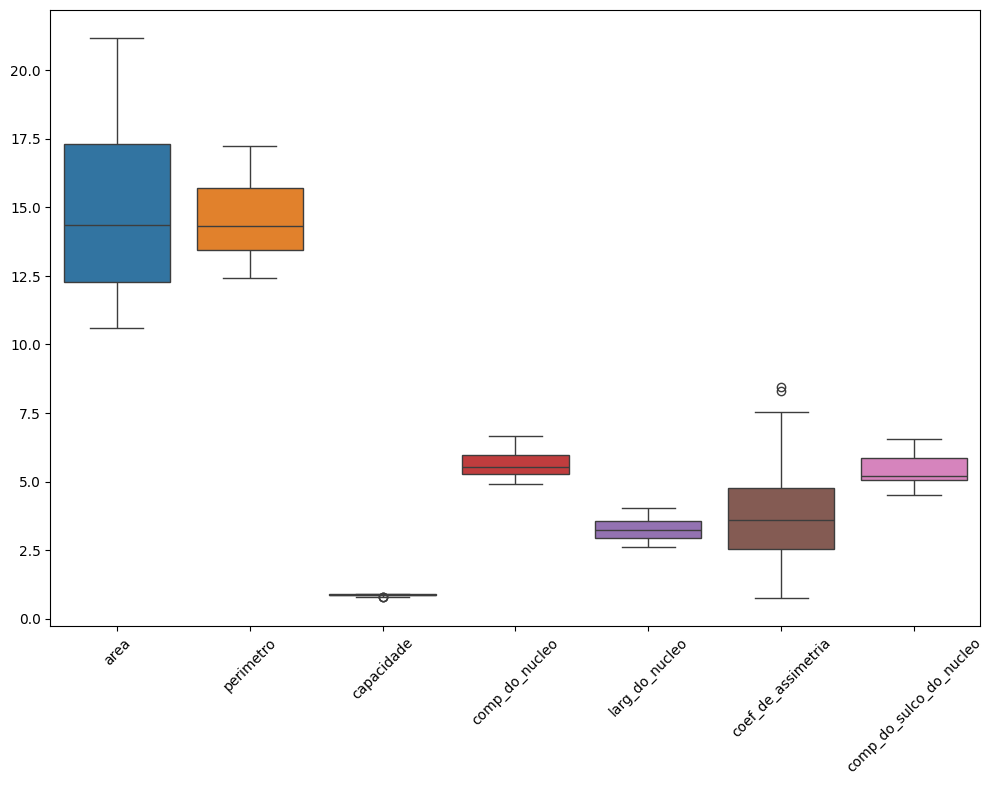

In [6]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=data[['area', 'perimetro', 'capacidade', 'comp_do_nucleo', 'larg_do_nucleo', 'coef_de_assimetria', 'comp_do_sulco_do_nucleo']])
plt.xticks(rotation=45)
plt.show()

Uma matriz de correlação nos permite identificar a correlação direta entre as variáveis, e aqui podemos concluir que a única variável que não possui correlação forte com  outros atributos do conjunto de dados é `coef_de_assimetria`. Como se trata de apenas uma variável, optamos por mantê-la no conjunto de dados para treinamentos dos modelos, pois justamente não sabemos ainda o impacto de removê-la.

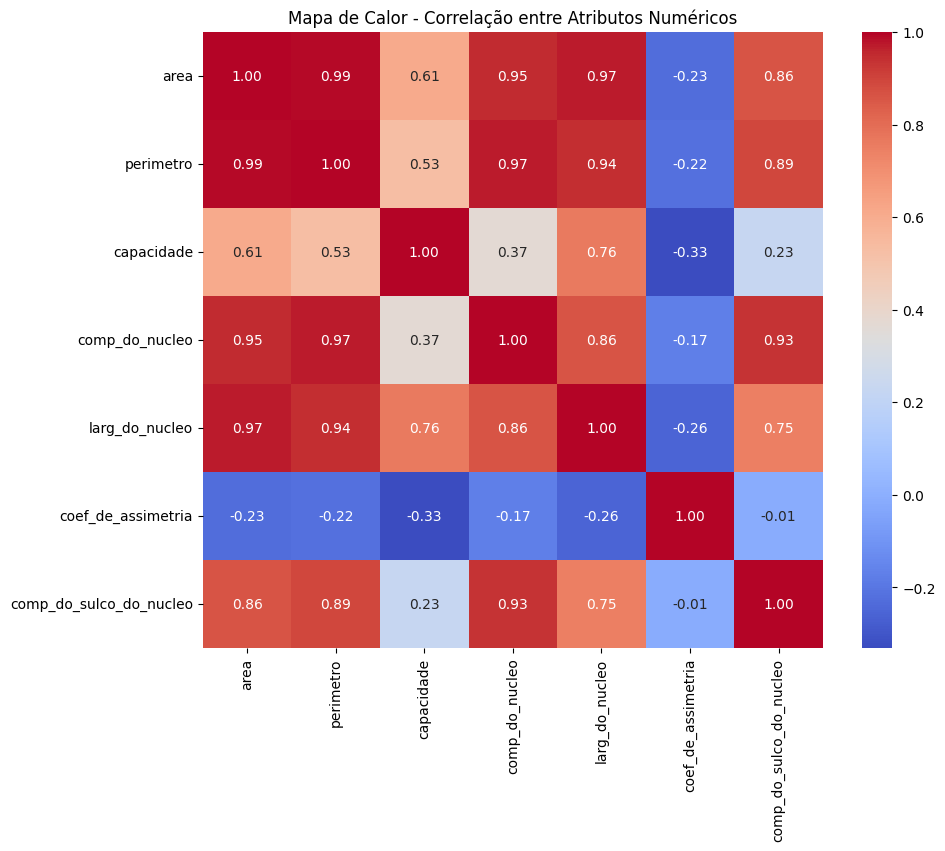

In [7]:
correlation_matrix = data[['area', 'perimetro', 'capacidade', 'comp_do_nucleo',
                           'larg_do_nucleo', 'coef_de_assimetria', 'comp_do_sulco_do_nucleo']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)

plt.title("Mapa de Calor - Correlação entre Atributos Numéricos")
plt.show()


## Escala dos dados

Escalar os dados uniformiza as variáveis e ajuda os algoritmos a performarem de maneira mais consistente. Como alguns modelos que iremos trabalhar dependem de escala numérica, aplicaremos

Devido ao fato de nosso dataset possuir colunas com valores significativamente diferentes, como por exemplo a `area` e o `perimetro`, que possuem valores que variam entre 10 e 20 (ou mais), o que reflete as dimensões físicas dos grãos, optamos por utilizar a técnica de padronização para escalar os dados, tendo em vista que os algoritmos KNN, SVM que utilizaremos nas análises se beneficiam disso. Também utilizaremos o algoritmo de random forest nas análises, mas a escala dos dados não afeta o funcionamento desse algoritmo.

In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[['area', 'perimetro', 'capacidade', 'comp_do_nucleo',
                                         'larg_do_nucleo', 'coef_de_assimetria', 'comp_do_sulco_do_nucleo']])
scaled_df = pd.DataFrame(scaled_data, columns=['area', 'perimetro', 'capacidade', 'comp_do_nucleo',
                                               'larg_do_nucleo', 'coef_de_assimetria', 'comp_do_sulco_do_nucleo'])
scaled_df.head()


,area,perimetro,capacidade,comp_do_nucleo,larg_do_nucleo,coef_de_assimetria,comp_do_sulco_do_nucleo
0,0.142098,0.215462,0.000061,0.304218,0.141702,-0.986152,-0.383577
1,0.011188,0.008224,0.428515,-0.168625,0.197432,-1.788166,-0.922013
2,-0.192067,-0.360201,1.442383,-0.763637,0.208048,-0.667479,-1.189192
3,-0.347091,-0.475333,1.039381,-0.688978,0.319508,-0.960818,-1.229983
4,0.445257,0.330595,1.374509,0.066666,0.805159,-1.563495,-0.475356


Incorporamos então os dados escalados ao dataset original, atualizando os valores numéricos:

In [12]:
data[['area', 'perimetro', 'capacidade', 'comp_do_nucleo', 'larg_do_nucleo',
      'coef_de_assimetria', 'comp_do_sulco_do_nucleo']] = scaled_df
data.head()


,area,perimetro,capacidade,comp_do_nucleo,larg_do_nucleo,coef_de_assimetria,comp_do_sulco_do_nucleo,classe
0,0.142098,0.215462,0.000061,0.304218,0.141702,-0.986152,-0.383577,1
1,0.011188,0.008224,0.428515,-0.168625,0.197432,-1.788166,-0.922013,1
2,-0.192067,-0.360201,1.442383,-0.763637,0.208048,-0.667479,-1.189192,1
3,-0.347091,-0.475333,1.039381,-0.688978,0.319508,-0.960818,-1.229983,1
4,0.445257,0.330595,1.374509,0.066666,0.805159,-1.563495,-0.475356,1


# Testes e comparação entre os algoritmos de classificação

## Divisão dos dados

Começamos com a divisão dos dados utilizando uma proporção 70/30, sendo 70% dos dados para treinamento e 30% para testes:

In [13]:
from sklearn.model_selection import train_test_split

# Separando as variáveis preditoras (X) e a variável alvo (y)
X = data[['area', 'perimetro', 'capacidade', 'comp_do_nucleo', 'larg_do_nucleo', 'coef_de_assimetria', 'comp_do_sulco_do_nucleo']]
y = data['classe']

# Divisão em conjuntos de treino e teste (70% treino, 30% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


## Treinamento dos modelos

Para nossas análises, optamos por utilizar modelos baseados nos algoritmos K-Nearest Neighbors (KNN), Random Forest, e Support Vector Machine (SVM).

In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# KNN
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

# Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

# SVM
svm = SVC(random_state=42)
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)


## Avaliação de desempenho dos modelos

Para avaliar o desempenho de cada modelo e simplificar o reuso do código, optamos por agrupar as análises de matriz de confusão, precisão, recall, f1-score, suporte e acurácia em uma única função.

In [17]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Função para avaliação
def evaluate_model(y_test, y_pred, model_name):
    print(f"Desempenho do modelo: {model_name}")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print(f"Acurácia: {accuracy_score(y_test, y_pred)}\n")

# Avaliação inicial de cada modelo
evaluate_model(y_test, knn_pred, "KNN")
evaluate_model(y_test, rf_pred, "Random Forest")
evaluate_model(y_test, svm_pred, "SVM")


Desempenho do modelo: KNN
[[18  0  2]
 [ 1 20  0]
 [ 3  0 19]]
              precision    recall  f1-score   support

           1       0.82      0.90      0.86        20
           2       1.00      0.95      0.98        21
           3       0.90      0.86      0.88        22

    accuracy                           0.90        63
   macro avg       0.91      0.91      0.91        63
weighted avg       0.91      0.90      0.91        63

Acurácia: 0.9047619047619048

Desempenho do modelo: Random Forest
[[18  0  2]
 [ 1 20  0]
 [ 4  0 18]]
              precision    recall  f1-score   support

           1       0.78      0.90      0.84        20
           2       1.00      0.95      0.98        21
           3       0.90      0.82      0.86        22

    accuracy                           0.89        63
   macro avg       0.89      0.89      0.89        63
weighted avg       0.90      0.89      0.89        63

Acurácia: 0.8888888888888888

Desempenho do modelo: SVM
[[18  0  2]
 [ 1

Com base nos resultados acima, podemos concluir o seguinte:

### Conclusões gerais

* O modelo SVM apresentou a melhor acurácia geral (92%), seguido de KNN (90%) e, por último, Random Forest (89%).
* O modelo SVM também obteve o melhor desempenho em métricas individuais como precisão, recall, e f1-score, indicando que ele é o modelo mais consistente entre os três.  *

### Análise por modelo

#### KNN (K-Nearest Neighbors)

* __Acurácia:__ 90.48%
* __Desempenho por classe__:
  * __Classe 1 (Kama)__: Recall de 90% indica que o modelo identificou bem a maioria dos grãos dessa classe, mas a precisão de 82% sugere que houveram algumas classificações erradas de outras classes como Kama.
  * __Classe 2 (Rosa)__: Excelente desempenho com 100% de precisão e 95% de recall.
  * __Classe 3 (Canadian)__: Recall de 86% mostra que o modelo perdeu algumas amostras dessa classe, mas a precisão de 90% indica que as predições foram boas.
* __Conclusão__: KNN é confiável, mas tem desempenho um pouco inferior ao SVM, especialmente para a Classe 1.

#### Random Forest

* __Acurácia:__ 88.89%
* __Desempenho por classe__:
  * __Classe 1 (Kama)__: Recall de 90% é bom, mas a precisão de 78% sugere que algumas amostras de outras classes foram erroneamente classificadas como Kama.
  * __Classe 2 (Rosa)__: Mantém excelente desempenho com 100% de precisão e 95% de recall.
  * __Classe 3 (Canadian)__: Recall de 82% e precisão de 90%, indicando que perdeu algumas amostras dessa classe.
* __Conclusão__: Random Forest é um pouco menos robusto que KNN e SVM, principalmente devido à menor precisão na Classe 1.

## SVM (Support Vector Machine)

* __Acurácia:__ 92.06%
* __Desempenho por classe__:
  * __Classe 1 (Kama)__: Recall de 90% e precisão de 86%, mostrando uma classificação sólida, embora ainda existam alguns erros.
  * __Classe 2 (Rosa)__: Excelente desempenho com 100% de precisão e 95% de recall, como nos outros modelos.
  * __Classe 3 (Canadian)__: Recall e precisão ambos em 91%, indicando um desempenho consistente para essa classe.
* __Conclusão__: SVM é o modelo mais equilibrado e apresenta o melhor desempenho geral, com alta precisão e recall para todas as classes.

### Conclusões por classe

* A Classe 2 (Rosa) foi a mais fácil de classificar para todos os modelos, com 100% de precisão em todos os casos e 95% de recall.
* As Classes 1 (Kama) e 3 (Canadian) apresentaram mais desafios, com erros de classificação cruzada entre elas.

### Conclusões por modelo

* __SVM é a melhor escolha__: Com a maior acurácia geral e métricas consistentes, SVM é o mais adequado para esse problema de classificação.
* __KNN pode ser usado como alternativa__: Apresenta desempenho competitivo e é fácil de implementar, mas tem mais erros na Classe 1.
* __Random Forest__: Apesar de ser um modelo poderoso, ele apresentou menor precisão para a Classe 1, tornando-o menos confiável neste caso específico.

# Otimização dos modelos

Cada modelo tem um conjunto específico de hiperparâmetros que podem ser ajustados:

* __KNN__: Número de vizinhos (`n_neighbors`), tipo de peso (`weights`), e métrica de distância (`metric`).
* __Random Forest__: Número de estimadores (`n_estimators`), profundidade máxima (`max_depth`), e critérios de divisão (`criterion`).
* __SVM__: Parâmetro de regularização (`C`), tipo de kernel (`kernel`), e coeficiente gamma (`gamma`).

A técnica de Grid Search permite avaliar o desempenho dos modelos com diferentes hiperparâmetros, possibilitando entender o impacto e escolher o melhor conjunto de parâmetros para que o modelo rode de maneira otimizada.

In [19]:
from sklearn.model_selection import GridSearchCV

# Função genérica para buscar os melhores hiperparâmetros
def optimize_model(model, param_grid, X_train, y_train):
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)
    grid_search.fit(X_train, y_train)
    print(f"Melhores hiperparâmetros: {grid_search.best_params_}")
    print(f"Melhor pontuação: {grid_search.best_score_}")
    return grid_search.best_estimator_

# Configuração dos hiperparâmetros para cada modelo
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'criterion': ['gini', 'entropy']
}

param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

# Treinar e otimizar cada modelo
print("Otimização KNN:")
best_knn = optimize_model(KNeighborsClassifier(), param_grid_knn, X_train, y_train)

print("\nOtimização Random Forest:")
best_rf = optimize_model(RandomForestClassifier(random_state=42), param_grid_rf, X_train, y_train)

print("\nOtimização SVM:")
best_svm = optimize_model(SVC(random_state=42), param_grid_svm, X_train, y_train)


Otimização KNN:
Fitting 5 folds for each of 16 candidates, totalling 80 fits


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Melhores hiperparâmetros: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'uniform'}
Melhor pontuação: 0.9524137931034483

Otimização Random Forest:
Fitting 5 folds for each of 18 candidates, totalling 90 fits
Melhores hiperparâmetros: {'criterion': 'gini', 'max_depth': None, 'n_estimators': 100}
Melhor pontuação: 0.9324137931034484

Otimização SVM:
Fitting 5 folds for each of 18 candidates, totalling 90 fits
Melhores hiperparâmetros: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
Melhor pontuação: 0.9593103448275861


Agora vamos avaliar novamente o desempenho dos modelos, após otimizar os hiperparâmetros:

In [23]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Função para avaliar um modelo
def evaluate_optimized_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    print(f"Desempenho do modelo otimizado: {model_name}")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print(f"Acurácia: {accuracy_score(y_test, y_pred)}\n")

# Avaliar os modelos otimizados
evaluate_optimized_model(best_knn, X_test, y_test, "KNN Otimizado")
evaluate_optimized_model(best_rf, X_test, y_test, "Random Forest Otimizado")
evaluate_optimized_model(best_svm, X_test, y_test, "SVM Otimizado")


Desempenho do modelo otimizado: KNN Otimizado
[[18  0  2]
 [ 1 20  0]
 [ 3  0 19]]
              precision    recall  f1-score   support

           1       0.82      0.90      0.86        20
           2       1.00      0.95      0.98        21
           3       0.90      0.86      0.88        22

    accuracy                           0.90        63
   macro avg       0.91      0.91      0.91        63
weighted avg       0.91      0.90      0.91        63

Acurácia: 0.9047619047619048

Desempenho do modelo otimizado: Random Forest Otimizado
[[18  0  2]
 [ 1 20  0]
 [ 4  0 18]]
              precision    recall  f1-score   support

           1       0.78      0.90      0.84        20
           2       1.00      0.95      0.98        21
           3       0.90      0.82      0.86        22

    accuracy                           0.89        63
   macro avg       0.89      0.89      0.89        63
weighted avg       0.90      0.89      0.89        63

Acurácia: 0.8888888888888888

De

## Conclusão

Os resultados obtidos foram em maior parte idênticos aos anteriores (antes de otimizarmos os hiperparâmetros), e resultou inclusive em uma pequena queda no desempenho do SVM. Sendo assim, podemos concluir que **não é necessário otimizar os modelos**.

# Insights e conclusões finais

O objetivo deste estudo é avaliar o desempenho de diferentes modelos de aprendizado de máquina (KNN, Random Forest e SVM) na classificação de grãos em três variedades: Kama, Rosa, e Canadian, com base em características físicas mensuráveis. A correta identificação dessas variedades é crucial no contexto agrícola, pois erros podem impactar tanto a qualidade do produto quanto o processo de distribuição, onde cada variedade pode exigir tratamentos específicos. A análise a seguir detalha os insights obtidos a partir dos resultados e os relaciona ao contexto do problema.

A classificação manual de grãos é um processo demorado e sujeito a erros humanos, o que justifica a busca por soluções automatizadas. A precisão do modelo é essencial, especialmente porque algumas variedades, como Kama e Canadian, apresentam características mais similares, aumentando o risco de confusões. Por outro lado, a variedade Rosa mostrou-se distinta e mais facilmente separável, conforme evidenciado pelos resultados consistentes entre os modelos.

A adoção de algoritmos de aprendizado de máquina, como os avaliados aqui, permite automatizar essa tarefa com maior eficiência e menor suscetibilidade a erros. No entanto, a escolha do modelo ideal depende de diversos fatores, incluindo desempenho técnico, simplicidade e facilidade de implementação.


## Análise aprofundada dos resultados:

Os três modelos apresentaram diferenças marcantes em desempenho, com SVM (na configuração inicial) mostrando-se superior, mas cada algoritmo revelou características específicas que merecem destaque.


### SVM: O melhor modelo

O SVM demonstrou excelente desempenho, com 92.06% de acurácia antes da otimização. A escolha inicial de um kernel linear pareceu capturar bem as fronteiras entre as classes. Embora a otimização tenha ajustado os hiperparâmetros para valores considerados teoricamente melhores, o desempenho caiu ligeiramente para 90.48%, evidenciando que a configuração inicial era mais adequada.

* __Classe Rosa__: SVM classificou quase perfeitamente, com precisão e recall de 100% e 95%, respectivamente.
* __Classes Kama e Canadian__: Os resultados também foram consistentes, embora pequenas confusões entre essas classes tenham sido observadas. Isso é esperado devido à proximidade de suas características físicas.

No contexto agrícola, o SVM é uma excelente escolha para tarefas de classificação de grãos, dado seu alto desempenho e capacidade de lidar com dados linearmente separáveis. A escolha do kernel linear reforça que as características disponíveis são suficientemente distintas para separar as classes sem transformações mais complexas.

### KNN: Simplicidade e eficácia

O KNN, com 90.48% de acurácia, é competitivo em relação ao SVM e apresenta um desempenho confiável, especialmente considerando sua simplicidade. Ele é mais intuitivo e rápido de implementar, não exigindo treinamento intensivo.

* __Pontos fortes__: O modelo obteve alta precisão na Classe Canadian (90%) e ótimo recall na Classe Kama (90%), o que é crucial em contextos onde essas variedades são mais difíceis de separar.
* __Limitações__: Como o KNN é sensível a outliers e à escala dos dados, confusões entre Kama e Canadian ocorreram. Isso reflete a proximidade de suas características, algo que modelos baseados em distância podem exacerbar.

No contexto de classificação de grãos, o KNN é adequado se houver necessidade de simplicidade e baixo custo computacional. No entanto, ele pode não ser a melhor escolha quando a separação entre as classes é muito crítica.

### Random Forest: Robustez, mas com baixa precisão

O Random Forest apresentou desempenho ligeiramente inferior, com uma acurácia de 88.89%, tanto antes quanto após a otimização. Sua robustez e capacidade de lidar com variáveis complexas são notáveis, mas não trouxe vantagens significativas no contexto deste problema.

* __Pontos fortes__: Excelente desempenho na Classe Rosa, com precisão e recall de 100% e 95%, alinhado aos outros modelos.
* __Limitações__: A Classe Kama apresentou a menor precisão (78%), indicando que o modelo confundiu grãos dessa classe com outras, possivelmente devido à alta variância do conjunto de árvores.

O Random Forest é uma escolha confiável em problemas mais complexos ou com dados ruidosos. No entanto, neste problema específico, ele não superou o SVM ou o KNN em termos de separação clara das classes.


## Insights Gerais

* **Consistência na Classe Rosa**: A Classe Rosa foi a mais fácil de classificar, independentemente do modelo utilizado. Isso indica que suas características físicas são bem distintas em relação às outras variedades. Para cenários onde a separação de Rosa é prioritária, qualquer um dos três modelos seria suficiente.

* **Desafios entre Kama e Canadian**: As confusões entre as Classes Kama e Canadian destacam a necessidade de melhorar a separação entre essas variedades. Apesar do SVM lidar melhor com essa tarefa, ainda houve erros significativos que podem impactar o processo agrícola. Isso sugere que explorar características adicionais (como textura ou cor) poderia melhorar o desempenho geral.

* **Impacto da Otimização**: A otimização dos hiperparâmetros não trouxe ganhos significativos e, em alguns casos, reduziu ligeiramente o desempenho (como no SVM). Isso reforça que os hiperparâmetros padrão dos modelos já estavam bem ajustados para este problema.

## Conclusão

O estudo mostrou que a escolha do modelo depende do equilíbrio entre precisão e simplicidade. O SVM se destacou como a melhor opção para a classificação de grãos, especialmente por sua alta precisão e robustez na separação entre as classes. No entanto, o KNN oferece uma alternativa prática e confiável para implementações rápidas. O Random Forest, embora robusto, apresentou limitações que o tornam menos competitivo neste cenário.

Essa análise demonstra como diferentes algoritmos podem ser aplicados no setor agrícola, contribuindo para a automação de processos críticos e garantindo maior eficiência e qualidade na classificação de grãos. Para melhorias futuras, recomenda-se explorar novos atributos e validar continuamente o modelo com dados reais do campo.